<a href="https://colab.research.google.com/github/archie-sinha/Machine-Learning/blob/main/ML_8_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Archisha Sinha**
##Course: Machine Learning
##Title: K -  Means

##Implementation of K means

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
x=[1,2,4,5]
y=[1,1,3,4]

In [12]:
# Taking value of k from the user
k = int(input("Enter the number of k turns: "))

Enter the number of k turns: 2


In [14]:
#Taking initial centroid points from the user

a= int(input("Enter x for c1: "))
b= int(input("Enter y for c1: "))
c1= (a,b)

print (c1)
c= int(input("Enter x for c2: "))
d= int(input("Enter y for c2: "))
c2= (c,d)
print (c2)

Enter x for c1: 1
Enter y for c1: 1
(1, 1)
Enter x for c2: 2
Enter y for c2: 1
(2, 1)


In [15]:
def implement_Edistance(test_x, test_y):
  dist=[]
  for i,j in zip(x, y):
      a= (test_x-i)**2
      b= (test_y-j)**2
      distance= math.sqrt(a+b)
      dist.append(distance)
  return (dist)

In [16]:
P= (implement_Edistance(a,b))
print(P)

[0.0, 1.0, 3.605551275463989, 5.0]


In [17]:
Q=(implement_Edistance(c,d))
print(Q)

[1.0, 0.0, 2.8284271247461903, 4.242640687119285]


In [18]:
point=[]
classes=[]
for i in range(len(x)):
  minimum= min(P[i],Q[i])
  print(minimum)
  point.append(minimum)
  if(minimum==P[i]):
    classes.append("C1")
  else:
    classes.append("C2")

0.0
0.0
2.8284271247461903
4.242640687119285


In [19]:
import pandas as pd

df = pd.DataFrame(list(zip(x, y, P, Q, point, classes)),
               columns =['X', 'Y', 'Dist from C1', 'Dist from C2', "Point", "Class"])
print (df)

   X  Y  Dist from C1  Dist from C2     Point Class
0  1  1      0.000000      1.000000  0.000000    C1
1  2  1      1.000000      0.000000  0.000000    C2
2  4  3      3.605551      2.828427  2.828427    C2
3  5  4      5.000000      4.242641  4.242641    C2


In [20]:
C1_count= classes.count("C1")
print (C1_count)
C2_count= classes.count("C2")
print(C2_count)

1
3


In [22]:
# Define a function to calculate Euclidean distance
def calculate_distance(point, centroid):
    return math.sqrt((point[0] - centroid[0]) ** 2 + (point[1] - centroid[1]) ** 2)

In [23]:
while True:
    # Assign points to the nearest centroid
    new_clusters = [[] for _ in range(k)]
    for i in range(len(x)):
        distances = [calculate_distance((x[i], y[i]), centroid) for centroid in centroids]
        min_distance_index = np.argmin(distances)
        new_clusters[min_distance_index].append((x[i], y[i]))

    # Update centroids
    new_centroids = []
    for cluster in new_clusters:
        if len(cluster) > 0:
            cluster_x = [point[0] for point in cluster]
            cluster_y = [point[1] for point in cluster]
            new_centroid = (np.mean(cluster_x), np.mean(cluster_y))
            new_centroids.append(new_centroid)
        else:
            # If a cluster is empty, keep its centroid unchanged
            new_centroids.append(centroids[len(new_centroids)])

    # Check for convergence
    if np.array_equal(centroids, new_centroids):
        break

    # Update centroids for the next iteration
    centroids = new_centroids


In [24]:
# Print final clusters
print("Final Clusters:")
for i, cluster in enumerate(new_clusters):
    print("Cluster", i + 1, ":", cluster)

Final Clusters:
Cluster 1 : [(1, 1), (2, 1)]
Cluster 2 : [(4, 3), (5, 4)]


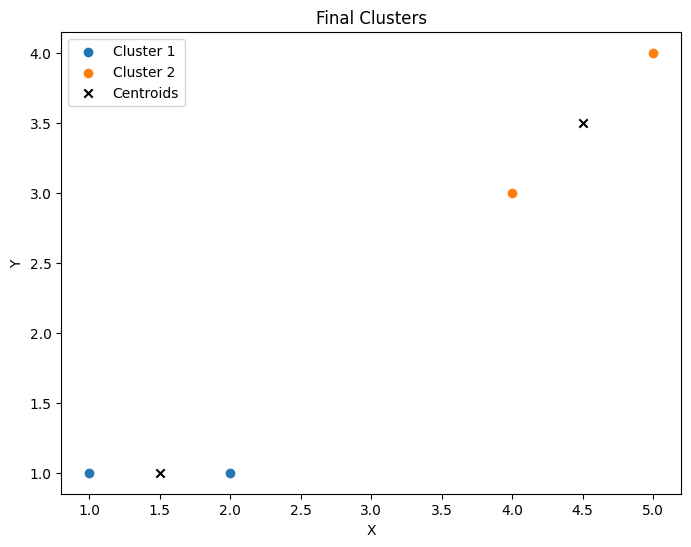

In [27]:
# Plot the final clusters
plt.figure(figsize=(8, 6))
for i, cluster in enumerate(new_clusters):
    cluster_x = [point[0] for point in cluster]
    cluster_y = [point[1] for point in cluster]
    plt.scatter(cluster_x, cluster_y, label=f'Cluster {i + 1}')

plt.scatter([centroid[0] for centroid in centroids], [centroid[1] for centroid in centroids],
            marker='x', color='black', label='Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Final Clusters')
plt.legend()
plt.show()